# SENTINEL HUB 1:CREATE A API CODE AND BASIC DOWNLOAD

 
Link to the accompany blog bellow with more description and Sentinel hub api code set up


https://jarvisjapan.com/2021/09/04/sentinel-hub-1create-a-api-code-and-basic-download%e3%80%80english-%e3%81%a8%e6%97%a5%e6%9c%ac%e8%aa%9e/

# Set up 

In [ ]:
!pip3 install sentinelhub 

## Imports 

In [ ]:
from sentinelhub import SHConfig
import numpy as np
import matplotlib.pyplot as plt

from sentinelhub import  CRS,BBox,  MimeType,SentinelHubRequest, SentinelHubDownloadClient, \
    DataCollection, bbox_to_dimensions, DownloadRequest

#Load Sentinel hub config 

In [ ]:
from google.colab import drive 
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:

!pip3 install python-dotenv
from dotenv import load_dotenv
import os 
load_dotenv("/content/drive/MyDrive/Accounts/sentinalhub.env")


True

In [ ]:
from sentinelhub import SHConfig
config = SHConfig()
config.sh_client_id=os.environ["ID"][0:~0]  #input("OAuth ID ") #"{OAuth ID }
config.sh_client_secret=os.environ["Secret"][0:~0] #= #input("OAuth secret key") #"{OAuth secret key}"
if not config.sh_client_id or not config.sh_client_secret:
    print("Warning! To use Process API, please provide the credentials (OAuth client ID and client secret).")

In [ ]:
os.environ["Secret"]

'67O%GB9KDk-1jMxU_7H}ye]dN8ggwO9lD(T]lJ|p'

# Add image location

Example Location Kew gardens UK 

Use http://geojson.io/ to add your own location

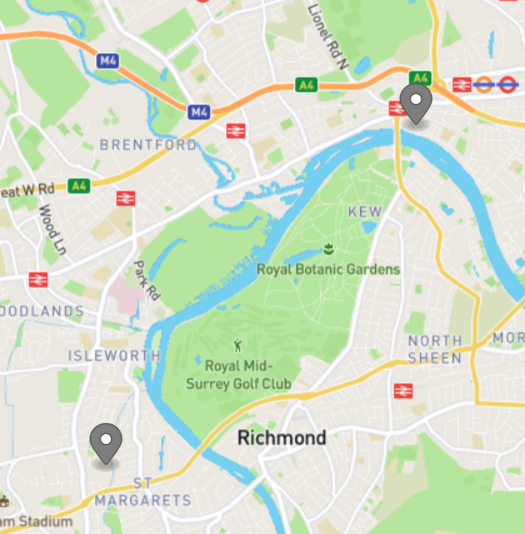

In [ ]:
target_coords = [  
                 -0.3273582458496094,
          51.45892724311225, 
       -0.2847862243652344,
          51.48801054716568
          
        ] #WGS84
res=2 #10  20 60 80
target_bbox= BBox(bbox=target_coords,crs=CRS.WGS84)
target_size= bbox_to_dimensions(target_bbox,resolution=res)

print(f'Image shape at {res} m resolution: {target_size} pixels')

Image shape at 2 m resolution: (1418, 1671) pixels


#Avalaible data collections 

Data Collections 

https://sentinelhub-py.readthedocs.io/en/latest/examples/data_collections.html

In [ ]:
for collection in DataCollection.get_available_collections():
    print(collection)

DataCollection.SENTINEL2_L1C
DataCollection.SENTINEL2_L2A
DataCollection.SENTINEL1
DataCollection.SENTINEL1_IW
DataCollection.SENTINEL1_IW_ASC
DataCollection.SENTINEL1_IW_DES
DataCollection.SENTINEL1_EW
DataCollection.SENTINEL1_EW_ASC
DataCollection.SENTINEL1_EW_DES
DataCollection.SENTINEL1_EW_SH
DataCollection.SENTINEL1_EW_SH_ASC
DataCollection.SENTINEL1_EW_SH_DES
DataCollection.DEM
DataCollection.DEM_MAPZEN
DataCollection.DEM_COPERNICUS_30
DataCollection.DEM_COPERNICUS_90
DataCollection.MODIS
DataCollection.LANDSAT15_L1
DataCollection.LANDSAT45_L1
DataCollection.LANDSAT45_L2
DataCollection.LANDSAT7_L1
DataCollection.LANDSAT7_L2
DataCollection.LANDSAT8
DataCollection.LANDSAT8_L1
DataCollection.LANDSAT8_L2
DataCollection.SENTINEL5P
DataCollection.SENTINEL3_OLCI
DataCollection.SENTINEL3_SLSTR


In [ ]:
DataCollection.SENTINEL2_L1C

<DataCollection.SENTINEL2_L1C: DataCollectionDefinition(
  api_id: sentinel-2-l1c
  catalog_id: sentinel-2-l1c
  wfs_id: DSS1
  collection_type: Sentinel-2
  sensor_type: MSI
  processing_level: L1C
  bands: ('B01', 'B02', 'B03', 'B04', 'B05', 'B06', 'B07', 'B08', 'B8A', 'B09', 'B10', 'B11', 'B12')
  is_timeless: False
  has_cloud_coverage: True
)>

#Download Data

## 1 True color evalscript

In [ ]:
evalscript_true_color="""
 //VERSION=3

    function setup() {
        return {
            input: [{
                bands: ["B02", "B03", "B04"]
            }],
            output: {
                bands: 3
            }
        };
    }

    function evaluatePixel(sample) {
        return [sample.B04, sample.B03, sample.B02];
    }
"""

## 2 Sentinel Hub request

In [ ]:
request_true_color = SentinelHubRequest(
    
    evalscript=evalscript_true_color,
    
    input_data=[
        SentinelHubRequest.input_data(
            data_collection=DataCollection.SENTINEL2_L1C,
            time_interval=('2020-12-1', '2020-12-30'),
            mosaicking_order='leastCC', #mostRecent leastRecent 
        )
    ],
  

    responses=[
        SentinelHubRequest.output_response('default', MimeType.PNG)
    ],

    bbox=target_bbox, #Target area 対象範囲
    size=target_size, #Resolution 解像度
    config=config 

)

In [ ]:
true_color_imgs = request_true_color.get_data()

In [ ]:
np.shape(true_color_imgs)

(1, 1671, 1418, 3)

In [ ]:
def RequestImage(time_interval,target_bbox,target_size,config=config,evalscript=evalscript_true_color,outType=MimeType.PNG):
  request_image= SentinelHubRequest(
    
    evalscript=evalscript,
    
    input_data=[
        SentinelHubRequest.input_data(
            data_collection=DataCollection.SENTINEL2_L1C,
            time_interval=time_interval, #('2020-12-1', '2020-12-30'),
            mosaicking_order='leastCC', #mostRecent leastRecent 
        )
    ],
  

    responses=[
        SentinelHubRequest.output_response('default', outType)
    ],

    bbox=target_bbox, #Target area 対象範囲
    size=target_size, #Resolution 解像度
    config=config 

)
  return request_image.get_data()


## 3 Quick Plot 

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


(-0.5, 1417.5, 1670.5, -0.5)

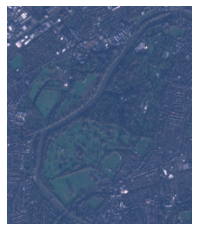

In [ ]:
plt.imshow(true_color_imgs[0]*3.5/255)
plt.axis(False)

In [ ]:
plt.figure(figsize=(8,6))
_= plt.hist(true_color_imgs[0][:,:,0].reshape(-1),bins=20,label="blue",color="blue",alpha=0.8)
_= plt.hist(true_color_imgs[0][:,:,1].reshape(-1),bins=20,label="green",color="green",alpha=0.8)
_= plt.hist(true_color_imgs[0][:,:,2].reshape(-1),bins=20,label="red",color="red",alpha=0.8)

# 5 The homework solution 

(-0.5, 1417.5, 1670.5, -0.5)

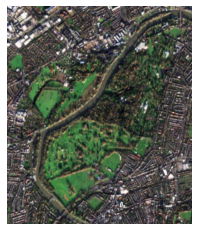

In [ ]:
def enhance_contrast(image_matrix, bins=256):
    image_flattened = image_matrix.flatten()
    image_hist = np.zeros(bins)

    # frequency count of each pixel
    for pix in image_matrix:
        image_hist[pix] += 1

    # cummulative sum
    cum_sum = np.cumsum(image_hist)
    norm = (cum_sum - cum_sum.min()) * 255
    # normalization of the pixel values
    n_ = cum_sum.max() - cum_sum.min()
    uniform_norm = norm / n_
    uniform_norm = uniform_norm.astype('int')

    # flat histogram
    image_eq = uniform_norm[image_flattened]
    # reshaping the flattened matrix to its original shape
    image_eq = np.reshape(a=image_eq, newshape=image_matrix.shape)

    return image_eq

image_src=true_color_imgs[0]
r_image = image_src[:, :, 0]
g_image = image_src[:, :, 1]
b_image = image_src[:, :, 2]

r_image_eq = enhance_contrast(image_matrix=r_image)
g_image_eq = enhance_contrast(image_matrix=g_image)
b_image_eq = enhance_contrast(image_matrix=b_image)


image_equalized= np.dstack(tup=(r_image_eq, g_image_eq, b_image_eq))

plt.imshow(image_equalized)
plt.axis(False)

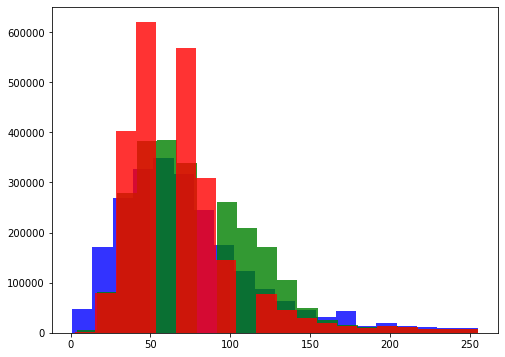

In [ ]:
def true_color_hist(true_color_imgs):
  plt.figure(figsize=(8,6))
  _= plt.hist(true_color_imgs[:,:,0].reshape(-1),bins=20,label="blue",color="blue",alpha=0.8)
  _= plt.hist(true_color_imgs[:,:,1].reshape(-1),bins=20,label="green",color="green",alpha=0.8)
  _= plt.hist(true_color_imgs[:,:,2].reshape(-1),bins=20,label="red",color="red",alpha=0.8)

true_color_hist(image_equalized)